In [10]:
getwd()
library("car")

[1] "/Users/suhasgupta/Library/Mobile Documents/com~apple~CloudDocs/MIDS Courses/W203 Statistics/HomeWork/Week 2/Lab 1/cancer"

In [11]:
cancerData = read.table('cancer.csv', header=T, sep = ",")

In [12]:
nrow(cancerData)  ## Number of observations 
str(cancerData)  ## Variables in the data set

[1] 3047

'data.frame':	3047 obs. of  30 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ avgAnnCount         : num  1397 173 102 427 57 ...
 $ medIncome           : int  61898 48127 49348 44243 49955 52313 37782 40189 42579 60397 ...
 $ popEst2015          : int  260131 43269 21026 75882 10321 61023 41516 20848 13088 843954 ...
 $ povertyPercent      : num  11.2 18.6 14.6 17.1 12.5 15.6 23.2 17.8 22.3 13.1 ...
 $ binnedInc           : Factor w/ 10 levels "(34218.1, 37413.8]",..: 9 6 6 4 6 7 2 2 3 8 ...
 $ MedianAge           : num  39.3 33 45 42.8 48.3 45.4 42.6 51.7 49.3 35.8 ...
 $ MedianAgeMale       : num  36.9 32.2 44 42.2 47.8 43.5 42.2 50.8 48.4 34.7 ...
 $ MedianAgeFemale     : num  41.7 33.7 45.8 43.4 48.9 48 43.5 52.5 49.8 37 ...
 $ Geography           : Factor w/ 3047 levels "Abbeville County, South Carolina",..: 1459 1460 1464 1589 1618 1766 2051 2112 2143 2185 ...
 $ AvgHouseholdSize    : num  2.54 2.34 2.62 2.52 2.34 2.58 2.42 2.24 2.38 2.65 ...
 $ PercentMarri

In [13]:
summary(cancerData$deathRate)
sd(cancerData$deathRate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   59.7   161.2   178.1   178.7   195.2   362.8 

[1] 27.75151

Looking at our main dependant variable "deathRate" we observe that it is spread out from below 100 to a few hundreds over all observations.The standard deviation is 27.75

We plot a histogram to visualize the distribution of the variable "deathRate".

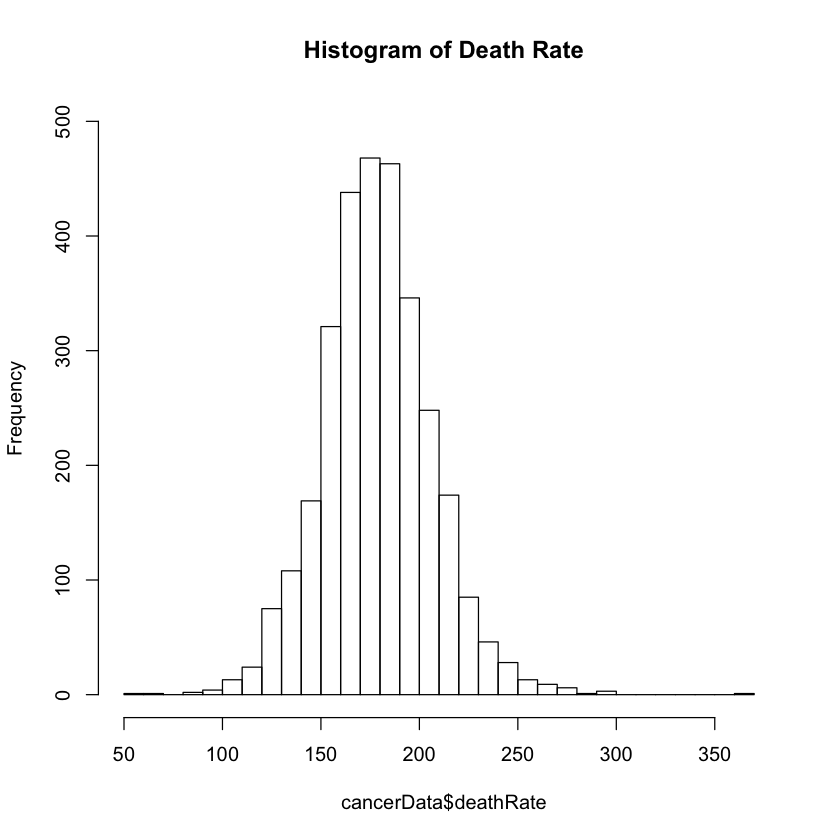

In [14]:
hist(cancerData$deathRate, breaks=30,xlim =c(50,375), ylim = c(0, 500), main="Histogram of Death Rate")

The values in death rate are distributed normally with median at 178.1 and std. deviation 27.75. The distribution doesn't have any significant skew since the mean and median are within 2% of 1 std. deviation for the data set. 

We observe that the maximum value (362.8) of death rate is 6 std. deviations from the mean. This can be visualized with a boxplot of deathRate. 

Now we examine the independant variables in the data set. Since there are a large number of variables in the data set, we will use a scatterplotMatrix to get a high level overview of the key relationships. However, sicne the variables are from different social/economic categories, we will plot scatterplotMatrix for each group separately to understand the impact of one group on deathRate. 

We begin with the variables associated with population data, i.e. avgAnnCount, popEst2015 & BirthRate

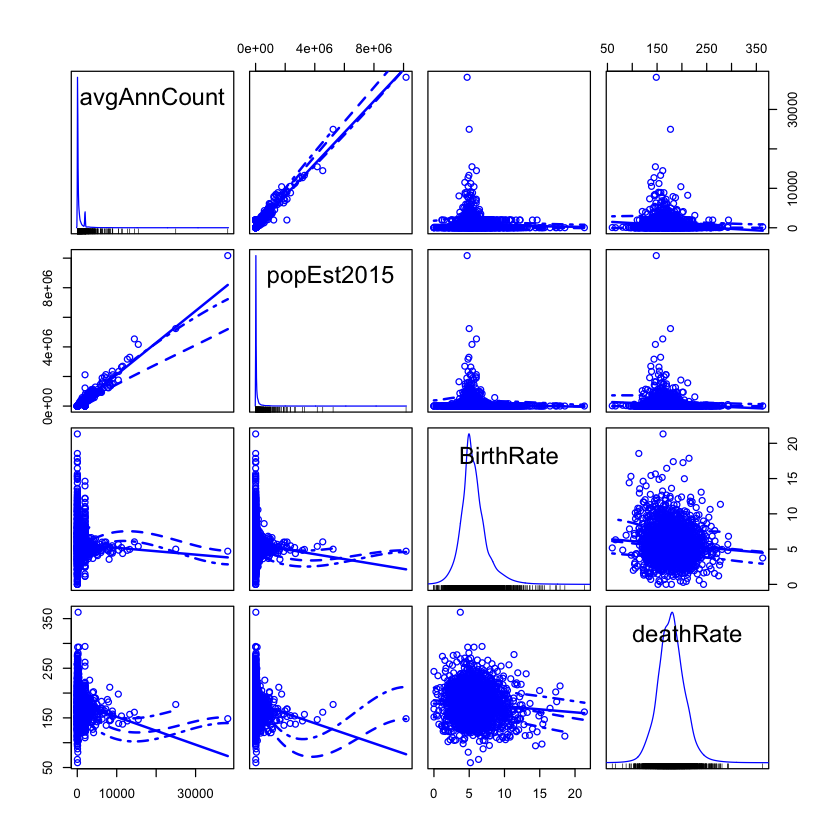

In [21]:
scatterplotMatrix(~ avgAnnCount + popEst2015 + BirthRate + deathRate, data = cancerData)

We observe an extreme positive skew with the variables "avgAnnCount" & "popEst2015" in the histograms above. We analyze these variables individually to understand the skewed behavior.

In [16]:
summary(cancerData$avgAnnCount)
sd(cancerData$avgAnnCount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.0    76.0   171.0   606.3   518.0 38150.0 

[1] 1416.356

We will apply log transformnaton to avgAnnCount to linearize the data trend.

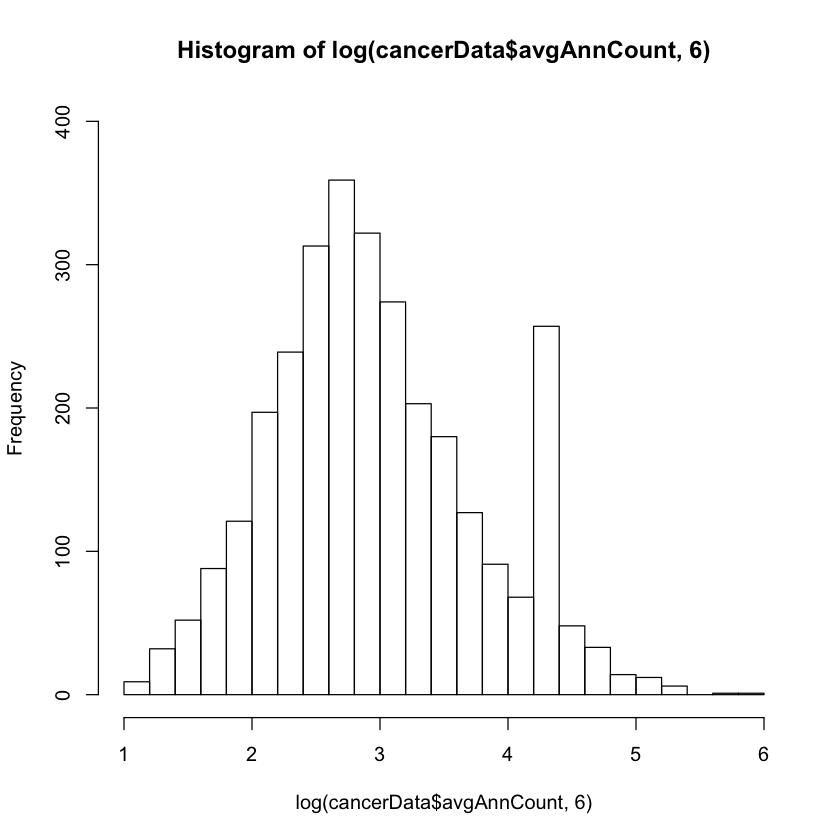

In [17]:
hist(log(cancerData$avgAnnCount,6), breaks=25, ylim = c(0,400), xlim=c(1,6))

We notice the second peak in the avgAnnCount histogram. The bimodal nature indicates that the data might be containing different sets of observations or it can also indicate some special relationship of deathRate with avgAnnCount. We will partition our data set into two to analyze this relationship. 

In [18]:
summary(cancerData$popEst2015)
sd(cancerData$popEst2015)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     827    11684    26643   102637    68671 10170292 

[1] 329059.2

We apply the log transformation to popEst2015 also to linearize the values for analysis.

In [19]:
summary(log(cancerData$popEst2015,6))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.749   5.227   5.687   5.768   6.216   9.005 

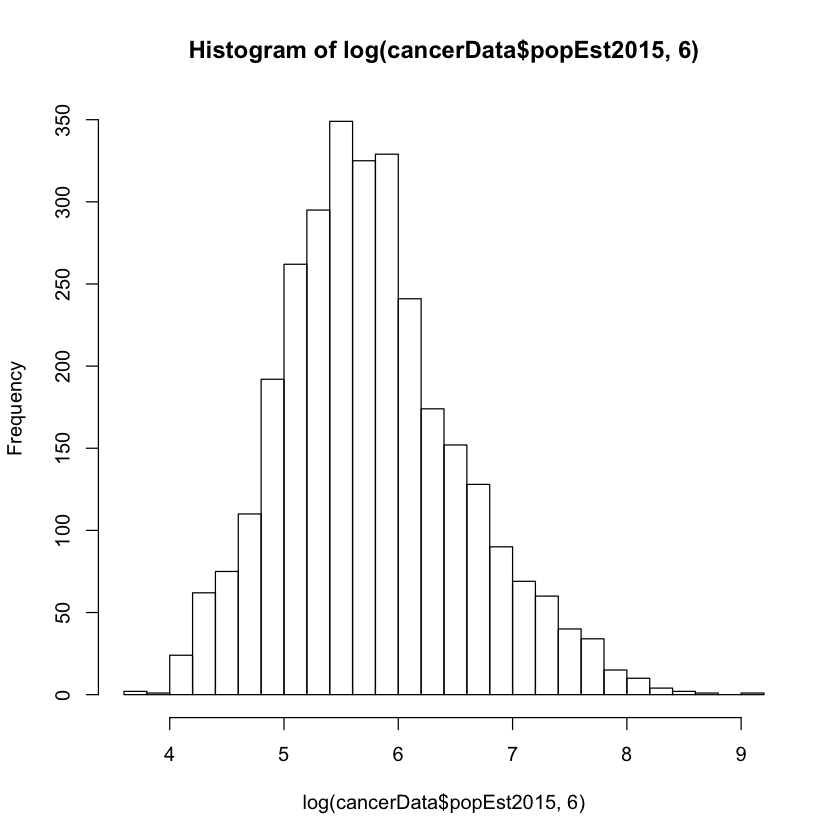

In [20]:
hist(log(cancerData$popEst2015,6), breaks=25)

The population variable popEst2015 has a lognormal distribution.

In [398]:
summary(cancerData$BirthRate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.521   5.381   5.640   6.494  21.326 

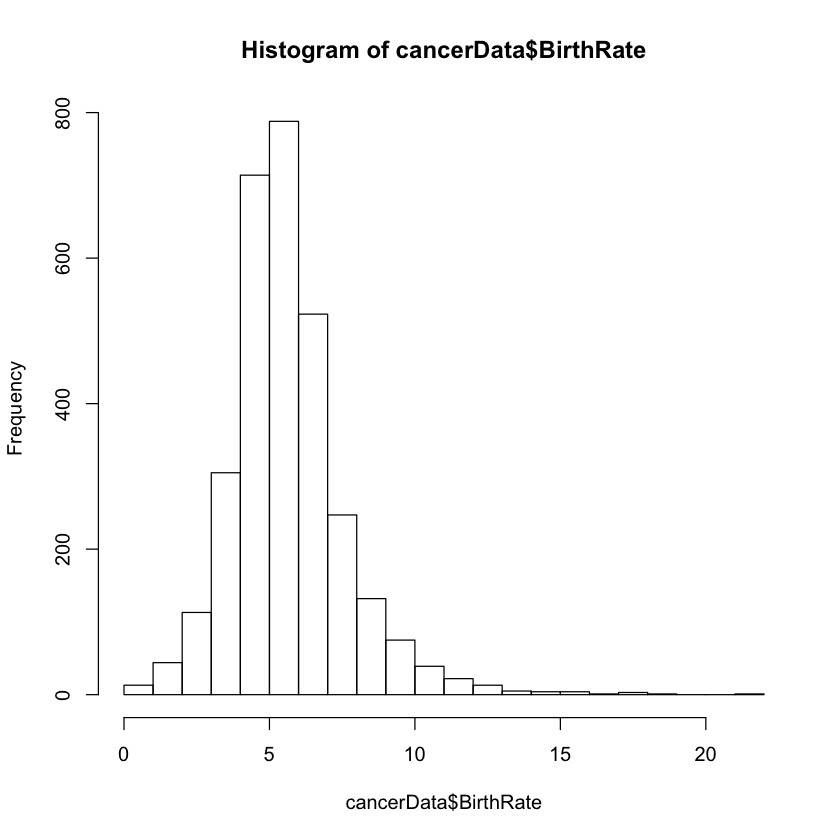

In [354]:
hist(cancerData$BirthRate, breaks=25)

The variable BirthRate also has a positive skew in its distribution.

Below we separate the data into two groups based on the values of avgAnnCount variable.

In [399]:
cancerData_sub1 = subset(cancerData, cancerData$avgAnnCount<=1900 | cancerData$avgAnnCount >=2000)
cancerData_sub2 = subset(cancerData, 1900 < cancerData$avgAnnCount & cancerData$avgAnnCount < 2000)
summary(cancerData_sub1$avgAnnCount)
summary(cancerData_sub2$avgAnnCount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.0    71.0   152.0   503.4   390.2 38150.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1908    1963    1963    1962    1963    1997 

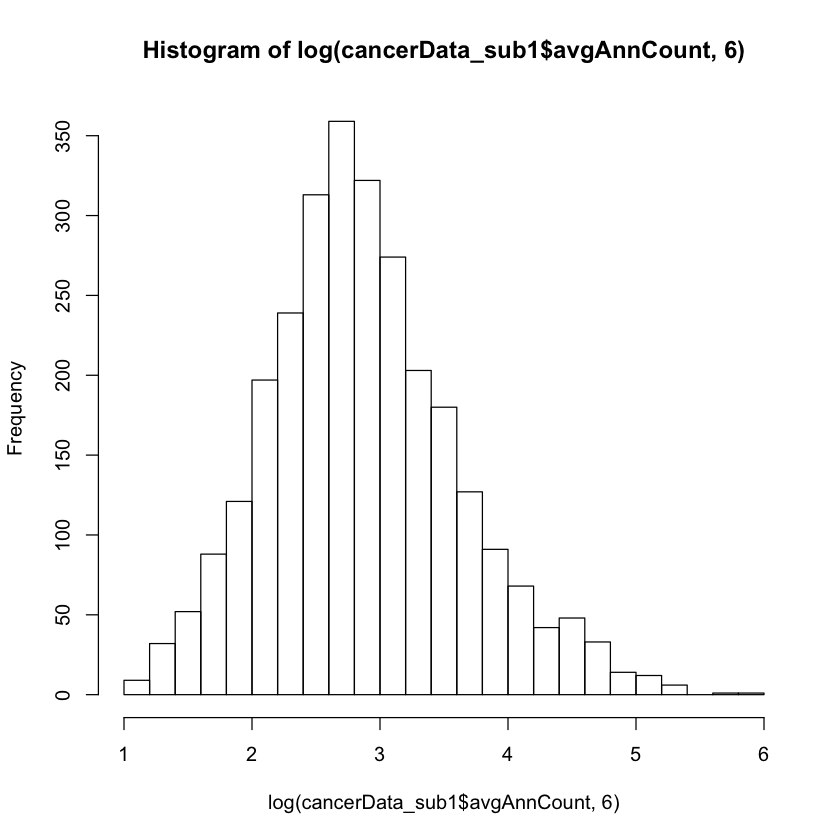

In [356]:
hist(log(cancerData_sub1$avgAnnCount,6), breaks=25, xlim=c(1,6))

In [400]:
summary(cancerData$MedianAge)
sd(cancerData$MedianAge)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.30   37.70   41.00   45.27   44.00  624.00 

[1] 45.30448

The maximum value of Median Age = 624 indicates problems with the dataset. A scatterplotMatrix of three age variables shows that there are errors in the MedianAge calculations in the dataset.

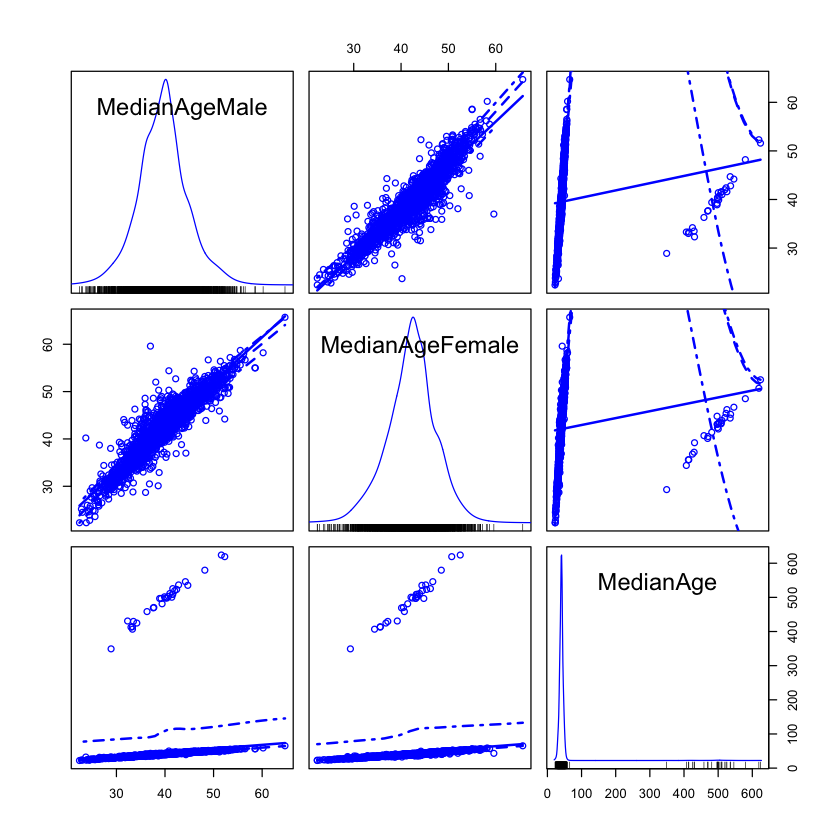

In [361]:
scatterplotMatrix(~ MedianAgeMale + MedianAgeFemale + MedianAge, data = cancerData)

In [360]:
MedianAgeFiltered = cancerData$MedianAge[cancerData$MedianAge<=200]
summary(MedianAgeFiltered)
length(MedianAgeFiltered)
length(cancerData$MedianAge[cancerData$MedianAge > 200])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.30   37.70   40.90   40.82   43.80   65.30 

[1] 3017

[1] 30

Analysis of the data set shows that MedianAge = (MedianAgeMale + MedianAgeFemale)/2 for most of the rows except for 30 rows that are anomolous. We can correct the MedianAge values based on the values in MedianAgeMale & MedianAgeFemale.

In [404]:
cancerData$MedianAge = (cancerData$MedianAgeMale + cancerData$MedianAgeFemale)/2

In [405]:
summary(cancerData$medIncome)
sd(cancerData$medIncome)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22640   38882   45207   47063   52492  125635 

[1] 12040.09

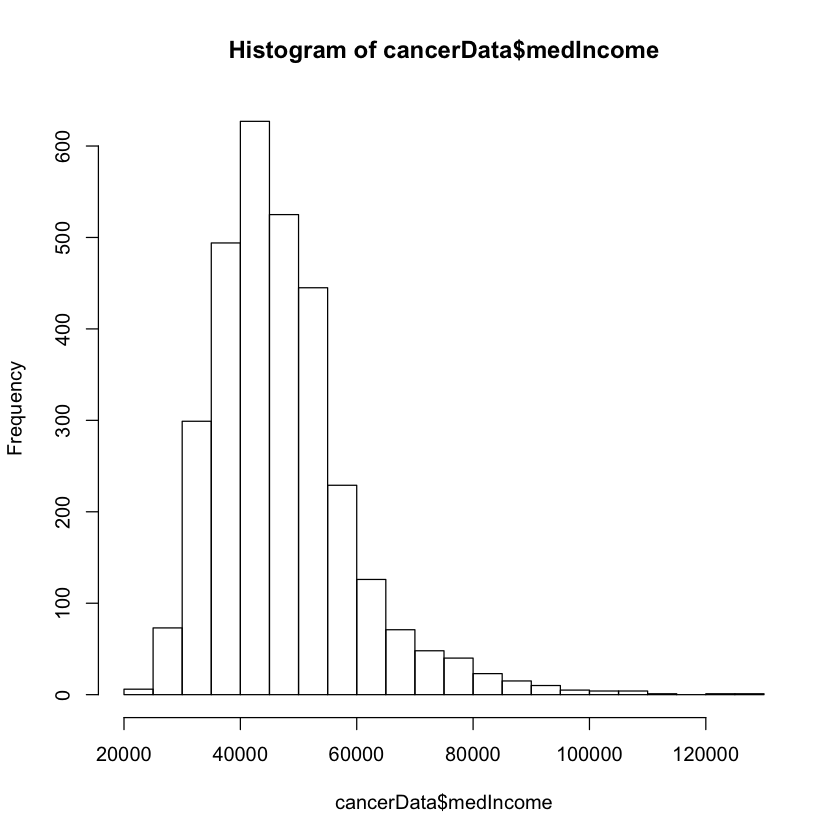

In [406]:
hist(cancerData$medIncome, breaks=25)

In [407]:
summary(cancerData$povertyPercent)
sd(cancerData$povertyPercent)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.20   12.15   15.90   16.88   20.40   47.40 

[1] 6.409087

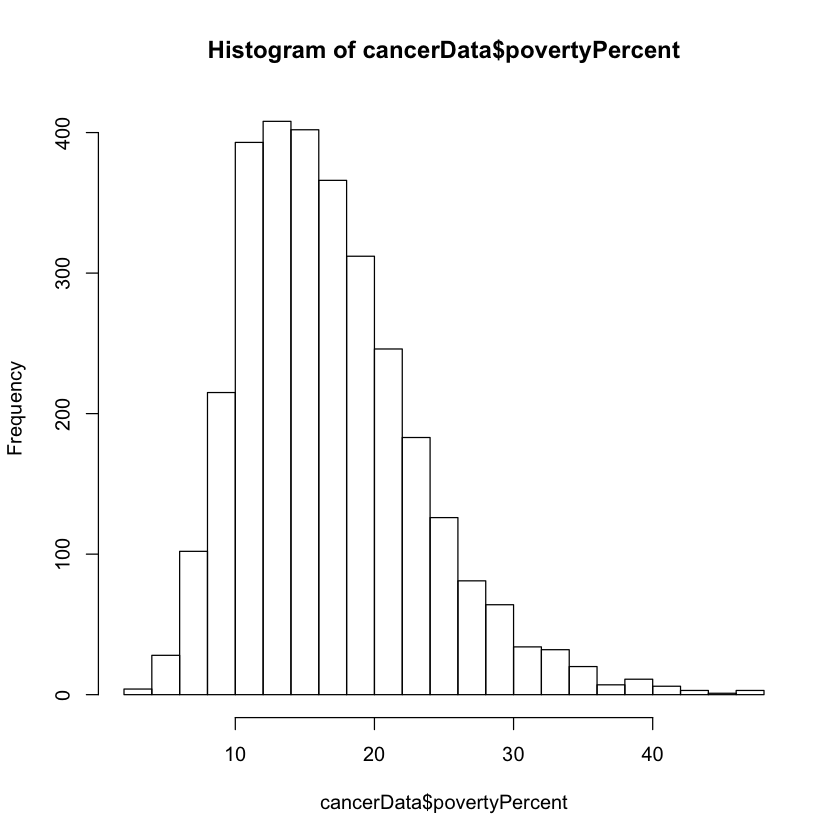

In [408]:
hist(cancerData$povertyPercent, breaks=25)

### binnedInc

In [409]:
summary(cancerData$binnedInc)

(34218.1, 37413.8] (37413.8, 40362.7] (40362.7, 42724.4]   (42724.4, 45201] 
               304                304                304                305 
  (45201, 48021.6] (48021.6, 51046.4] (51046.4, 54545.6] (54545.6, 61494.5] 
               306                305                305                306 
 (61494.5, 125635]   [22640, 34218.1] 
               302                306

binnedInc is a factor with income bins in the data set. We will sort the bins in increasing order to perform bivariate anaylsis with deathRate.

## Bivariate Analysis

### Performing bivariate analysis with dataset1 (cancerData_sub1)

We will first plot the scatter plot Matrix again with the filtered data set to get the new high level overview of the relationships.

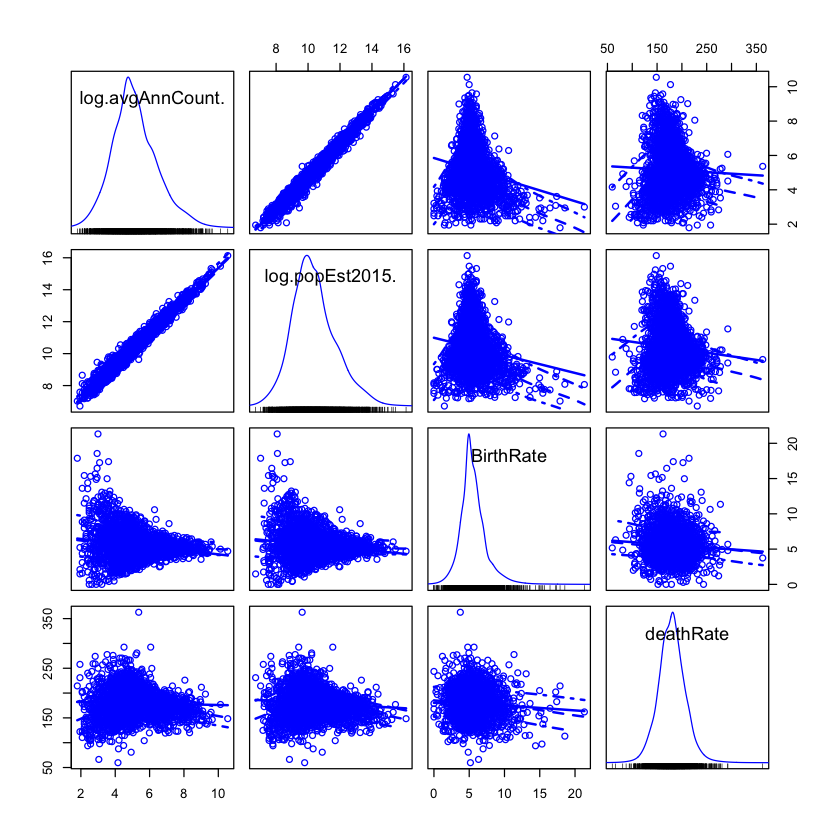

In [410]:
scatterplotMatrix(~ log(avgAnnCount) + log(popEst2015) + BirthRate + deathRate, data = cancerData_sub1)

#### avgAnnCount vs DeathRate

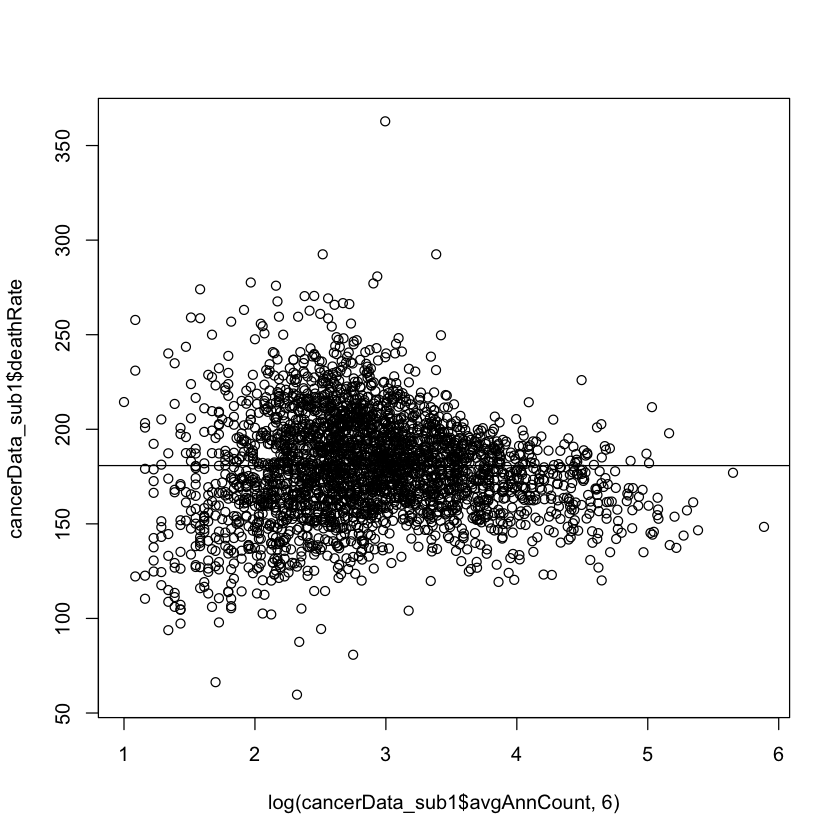

In [411]:
plot(log(cancerData_sub1$avgAnnCount,6), cancerData_sub1$deathRate)
abline(lm(cancerData_sub1$deathRate ~ cancerData_sub1$avgAnnCount))

In [412]:
cor(cancerData_sub1$deathRate, cancerData_sub1$avgAnnCount)

[1] -0.1177481

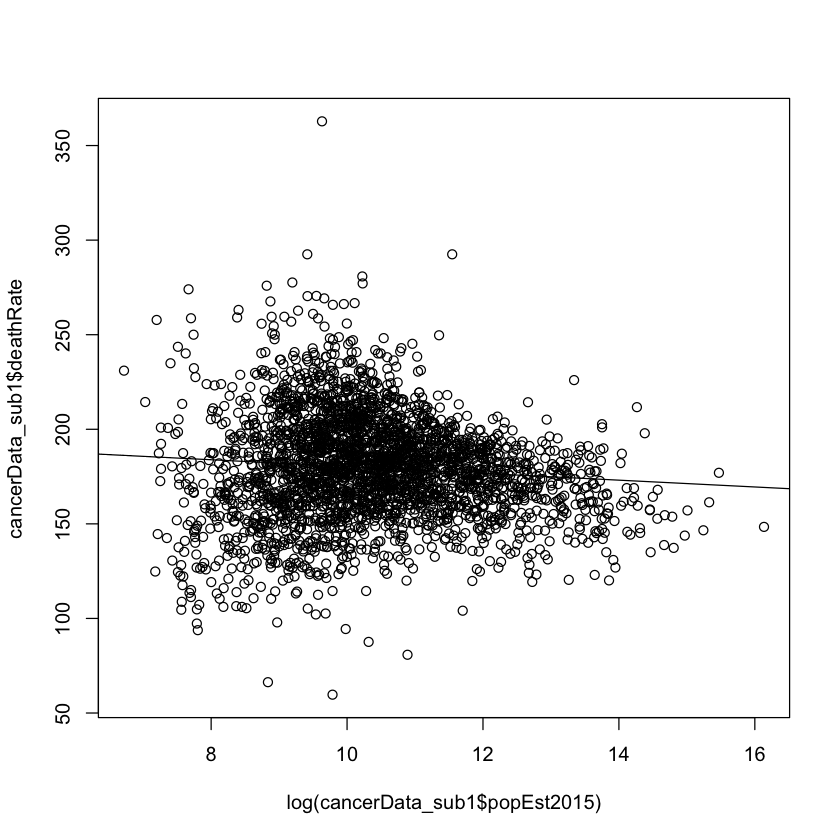

In [413]:
plot(log(cancerData_sub1$popEst2015),cancerData_sub1$deathRate)
abline(lm(cancerData_sub1$deathRate ~ log(cancerData_sub1$popEst2015)))

In [414]:
cor(log(cancerData_sub1$popEst2015),cancerData_sub1$deathRate)

[1] -0.09053924

In [22]:
plot(cancerData_sub1$BirthRate,cancerData_sub1$deathRate)
abline(lm(cancerData_sub1$BirthRate ~ cancerData_sub1$deathRate))

ERROR: Error in plot(cancerData_sub1$BirthRate, cancerData_sub1$deathRate): object 'cancerData_sub1' not found


In [416]:
cor(cancerData_sub1$BirthRate, cancerData_sub1$deathRate)

[1] -0.07190818

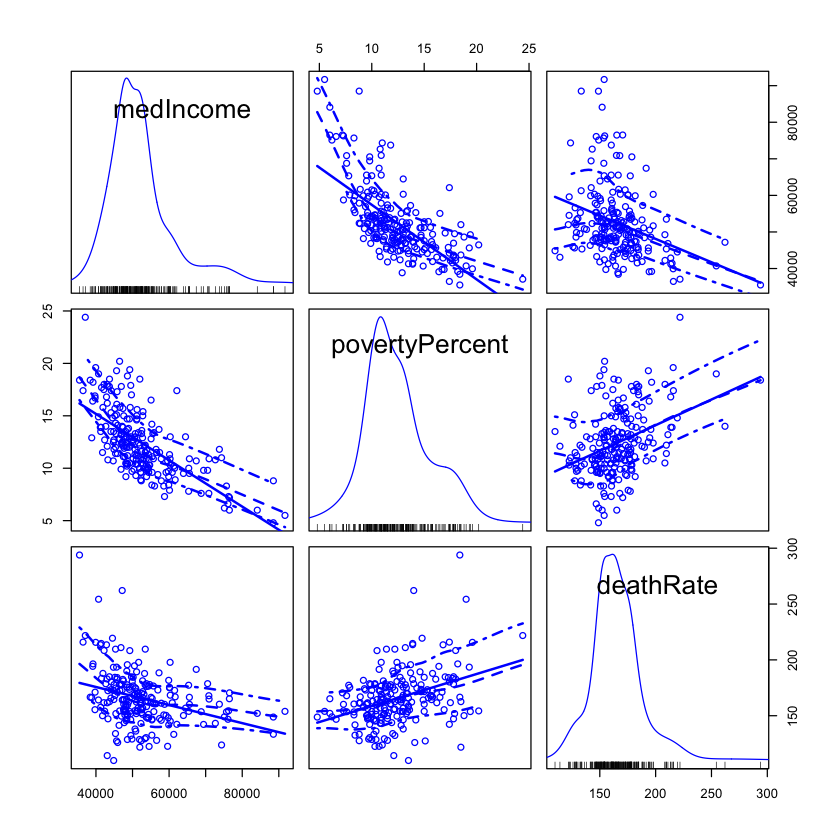

In [417]:
scatterplotMatrix(~ medIncome + povertyPercent + deathRate, data = cancerData_sub2)

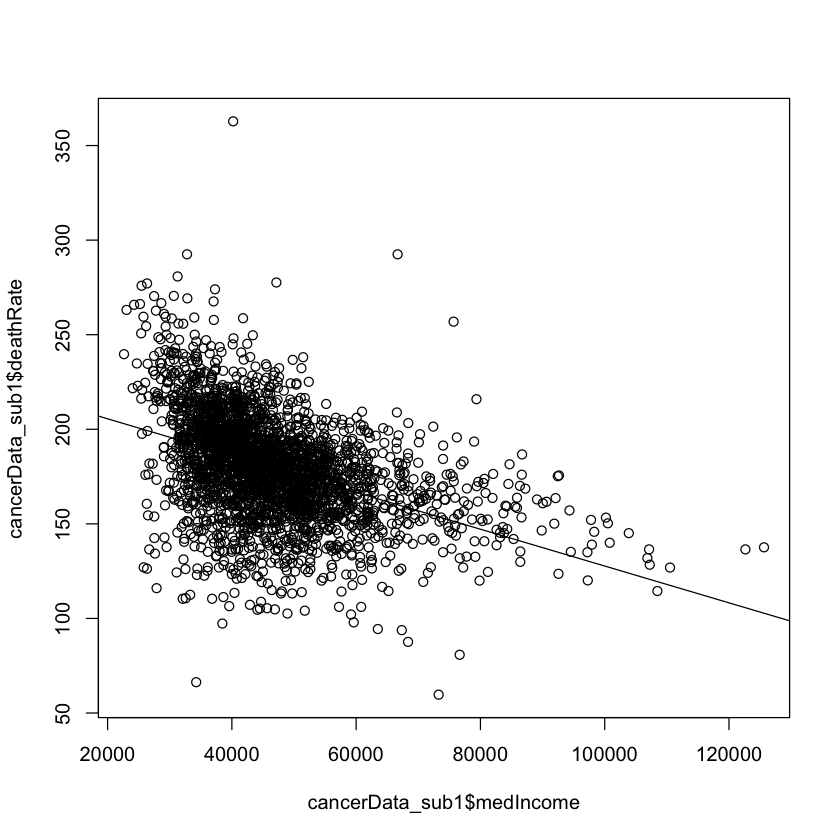

In [418]:
plot(cancerData_sub1$medIncome, cancerData_sub1$deathRate)
abline(lm(cancerData_sub1$deathRate ~ cancerData_sub1$medIncome))

In [419]:
cor(cancerData_sub1$medIncome, cancerData_sub1$deathRate)

[1] -0.4246346

There is significant negative correlation between the medIncome & deathRate variables

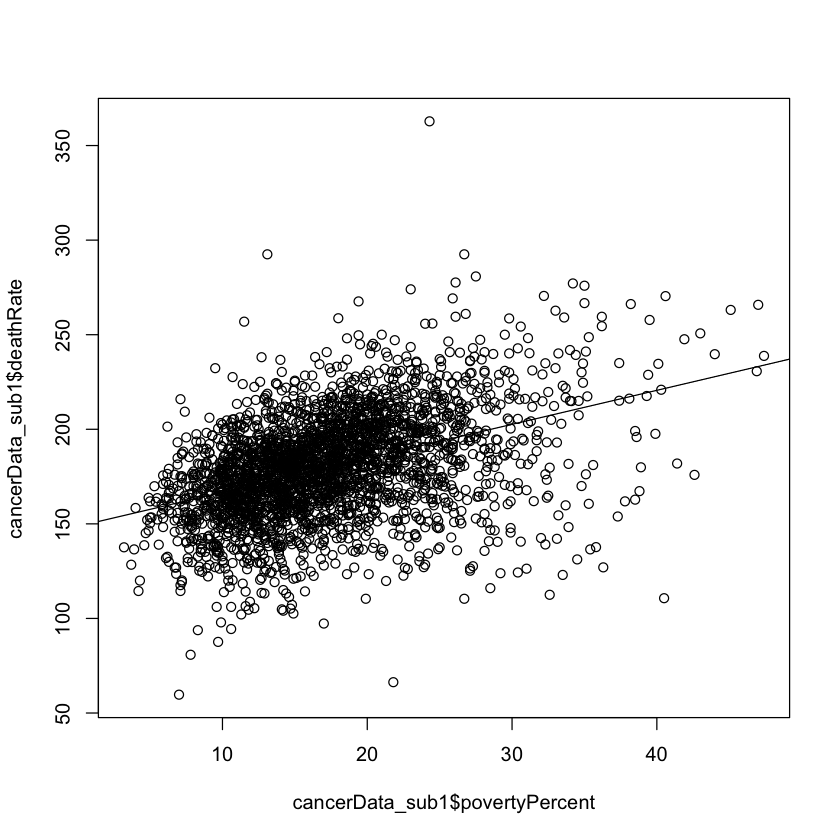

In [420]:
plot(cancerData_sub1$povertyPercent, cancerData_sub1$deathRate)
abline(lm(cancerData_sub1$deathRate ~ cancerData_sub1$povertyPercent))

In [421]:
cor(cancerData_sub1$povertyPercent, cancerData_sub1$deathRate)

[1] 0.419374

##### There is significant negative correlation between the povertyPercent & deathRate variables

In [422]:
cor(cancerData_sub2$povertyPercent, cancerData_sub2$medIncome)

[1] -0.6714475

Not surprisingly, povertyPercent in a county is negative correlated to the median Income in the county.
i.e. As the median income in a county increases, the poverty percentage in the county goes down. 

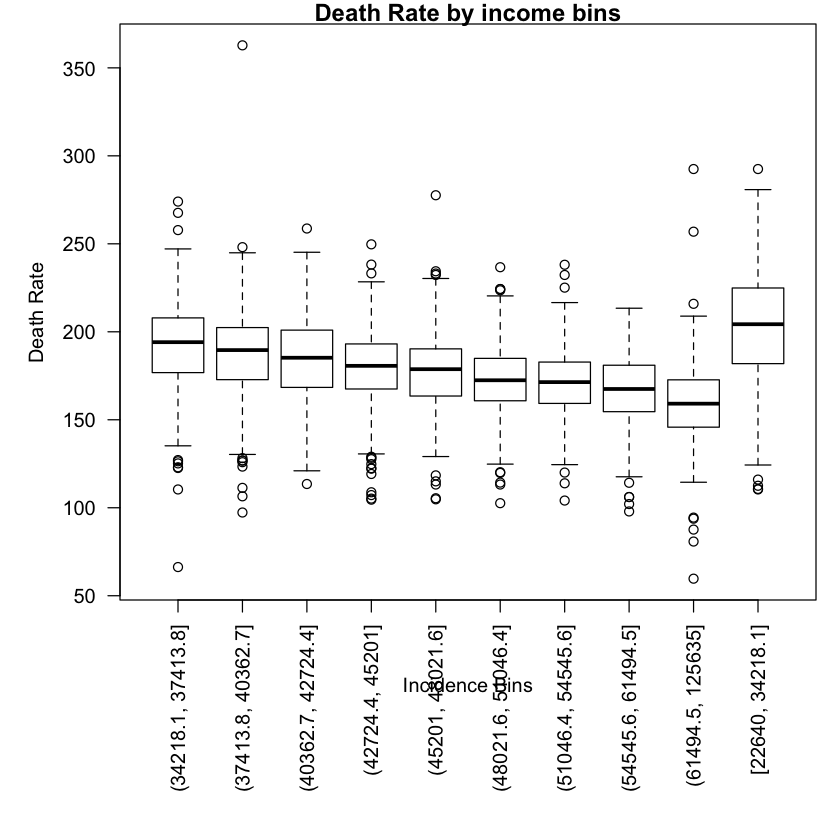

In [423]:
par(mar=c(10,5,1,1))
boxplot(deathRate ~ binnedInc, data = cancerData_sub1,
        main = "Death Rate by income bins",
        xlab = "Incidence Bins", ylab = "Death Rate",
        las = 2
        )